<img src = "https://i.imgur.com/UjutVJd.jpg" align = "center">

# Project Deep Learning

Buatlah model Deep Learning yang mampu mengklasifikasikan 20 kelas gambar dari dataset yang diberikan

## Instruksi Pengerjaan
1. Copy colab file ke drive masing-masing
1. Rename file colab dengan format : `Project_Kelompok.ipynb`
 * misal kelompok kalian adalah kelompok `1_4`, 
 * maka nama file haruslah `Project_1_4.ipynb`
1. Lengkapi bagian kode
1. Berikan dokumentasi yang jelas pada setiap cell kode
---

## [TASK]  Rename File
<font color='red' size=5><pre>Rename File Colab sesuai instruksi</pre></font>

---

## Load Modul dan Library

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

np.set_printoptions(precision=7)
%matplotlib inline

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from collections import Counter
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

from PIL import Image



W0814 15:12:04.643322 140066755385216 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



---
# Load Dataset

Proses ini akan mengunduh dataset gambar untuk kasus klasifikasi dengan 20 kelas berdasarkan dataset Pascal VOC 2007

## [TASK] Define input size

Rata-rata ukuran gambar adalah `(380, 470, 3)`

Untuk mengurangi komputasi dan memori yang digunakan, resize image menjadi ukuran yang lebih kecil

Tradeoffs:
* makin kecil gambar, akurasi bisa menurun
* makin besar gambar, makin berat di komputasi dan memori


<br>

<font color='red' size=5><pre>Definisikan ukuran citra yang akan digunakan!</pre></font>

In [0]:
input_shape = (224, 224, 3)

## Load Dataset

In [0]:
!wget 'https://raw.githubusercontent.com/adf-telkomuniv/FG_AI_Public/master/others/project_data_loader.py'

from project_data_loader import DataLoader

--2019-08-14 15:12:05--  https://raw.githubusercontent.com/adf-telkomuniv/FG_AI_Public/master/others/project_data_loader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2567 (2.5K) [text/plain]
Saving to: ‘project_data_loader.py’

project_data_loader 100%[===================>]   2.51K  --.-KB/s    in 0s      

2019-08-14 15:12:05 (72.6 MB/s) - ‘project_data_loader.py’ saved [2567/2567]



In [0]:
loader = DataLoader(input_shape)
(X_train, y_train), (X_val, y_val), (X_test, y_test), class_names = loader.load_data()

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0814 15:14:08.637183 140066755385216 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset voc2007 downloaded and prepared to /root/tensorflow_datasets/voc2007/1.0.0. Subsequent calls will reuse this data.


W0814 15:14:28.809182 140066755385216 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [0]:
num_class = len(class_names)

print('terdapat',num_class,'kelas di dalam dataset')
print('daftar kelas:\n', class_names)


terdapat 20 kelas di dalam dataset
daftar kelas:
 ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


Cek ukuran dataset


In [0]:
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

print('\nX_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)

print('\nX_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (2825, 224, 224, 3)
y_train.shape = (2825,)

X_val.shape   = (2888, 224, 224, 3)
y_val.shape   = (2888,)

X_test.shape  = (2000, 224, 224, 3)
y_test.shape  = (2000,)



**harusnya kalian akan mendapatkan hasil**:
<pre>X_train.shape = (2825, ??, ??, 3)
y_train.shape = (2825,)

X_val.shape   = (2888,  ??, ??, 3)
y_val.shape   = (2888,)

X_test.shape  = (2000, ??, ??, 3)
y_test.shape  = (2000,)

di mana `??` akan sesuai dengan ukuran `input_shape`
</pre>

In [0]:
X_test=X_test[:2000]

---
## [TASK] One-hot Label

<font color='red' size=5><pre>Ubah vektor y_train, y_val, dan y_test menjadi bentuk one hot matrix</pre></font>



In [0]:
y_train_hot = to_categorical(y_train)
y_val_hot   = to_categorical(y_val)
y_test_hot  = to_categorical(y_test)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (2825, 20)
y_val_hot.shape   = (2888, 20)
y_test_hot.shape  = (2000, 20)


**harusnya kalian akan mendapatkan hasil**:
<pre>y_train_hot.shape = (2825, 20)
y_val_hot.shape   = (2888, 20)
y_test_hot.shape  = (2000, 20)
</pre>

## View Dataset

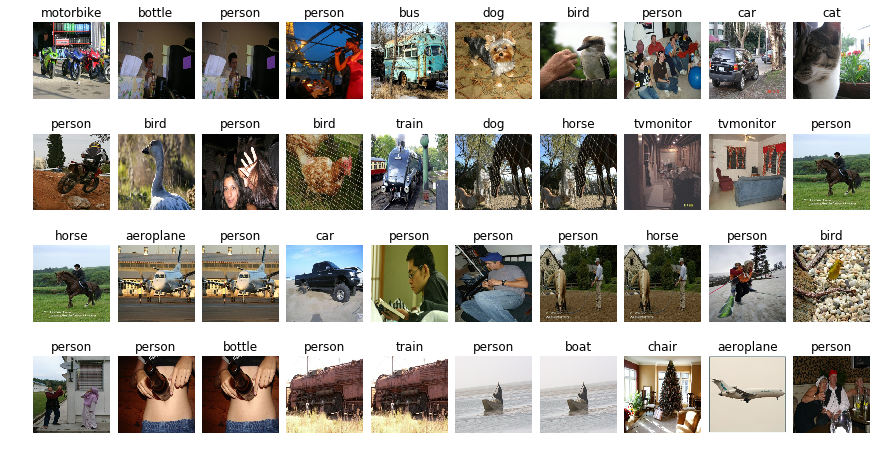

In [0]:
fig, ax = plt.subplots(4,10,figsize=(15,8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,4):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10,:,:,:])
        ax[j,i].set_title(class_names[y_train[i+j*10]])
        ax[j,i].axis('off')
plt.show()

---
# Classification Model

## [TASK] Create your own model
<font color='red' size=5><pre>Buatlah model klasifikasimu sendiri!!</pre></font>


Misalnya:
* load pretrain
* define new layers
* define trainable layers
* have fun

In [0]:
# import model from tensorflow
#from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.vgg16 import VGG16

In [0]:
#model = Xception(weights='imagenet', include_top=False)
model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape, pooling='avg')

94658560/94653016 [==============================] - 8s 0us/step


In [0]:
#freeze conv layer
#for layer in model.layers:
#  layer.trainable = False    

In [0]:
# model baru
x = model.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)

myModel = Model(inputs=model.input, outputs=predictions, name='VGG ImageNet')
myModel.summary()

W0814 15:15:40.203868 140066755385216 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "VGG ImageNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_______________________________________________________________________________________

In [0]:
#freeze half: select first 14 layer to freeze
for i, layer in enumerate(myModel.layers):
  print(i, layer.name) 

0 input_1
1 conv1_pad
2 conv1
3 bn_conv1
4 activation
5 pool1_pad
6 max_pooling2d
7 res2a_branch2a
8 bn2a_branch2a
9 activation_1
10 res2a_branch2b
11 bn2a_branch2b
12 activation_2
13 res2a_branch2c
14 res2a_branch1
15 bn2a_branch2c
16 bn2a_branch1
17 add
18 activation_3
19 res2b_branch2a
20 bn2b_branch2a
21 activation_4
22 res2b_branch2b
23 bn2b_branch2b
24 activation_5
25 res2b_branch2c
26 bn2b_branch2c
27 add_1
28 activation_6
29 res2c_branch2a
30 bn2c_branch2a
31 activation_7
32 res2c_branch2b
33 bn2c_branch2b
34 activation_8
35 res2c_branch2c
36 bn2c_branch2c
37 add_2
38 activation_9
39 res3a_branch2a
40 bn3a_branch2a
41 activation_10
42 res3a_branch2b
43 bn3a_branch2b
44 activation_11
45 res3a_branch2c
46 res3a_branch1
47 bn3a_branch2c
48 bn3a_branch1
49 add_3
50 activation_12
51 res3b_branch2a
52 bn3b_branch2a
53 activation_13
54 res3b_branch2b
55 bn3b_branch2b
56 activation_14
57 res3b_branch2c
58 bn3b_branch2c
59 add_4
60 activation_15
61 res3c_branch2a
62 bn3c_branch2a
63 act

In [0]:
for layer in myModel.layers[:163]:
    layer.trainable = False
for layer in myModel.layers[163:]:
    layer.trainable = True

myModel.summary()

Model: "VGG ImageNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_______________________________________________________________________________________

## [TASK] Compile Model
<font color='red' size=5><pre>Compile modelmu dengan loss dan metrik pilihanmu!</pre></font>



In [0]:
opt = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6)

In [0]:
myModel.compile(loss='categorical_crossentropy',
                        optimizer=opt, metrics=['accuracy'])

---
# Data Preparation

## [TASK] Normalize Data

<br>

**OPTIONAL TASK**<br>
<font color='blue' size=5><pre>Normalisasikan data jika diperlukan!</pre></font>


have fun

In [0]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (2825, 20)
y_val_hot.shape   = (2888, 20)
y_test_hot.shape  = (2000, 20)


## [TASK] Additional Scheme

<br>

**OPTIONAL TASK**<br>
<font color='blue' size=5><pre>Tambahkan skema dan implementasi yang ingin kalian lakukan</pre></font>


Misalnya:
* Data Augmentation
* Custom training function
* Checkpoint
* Learning Rate Annealing
* have fun

In [0]:
#Data Augmentation

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)

In [0]:
datagen.fit(X_train)

---
# Train and Testing




## [TASK] Train the Model
<font color='red' size=5><pre>Latih modelmu! <br>Definisikanlah batch size dan epoch!!<br>Gunakan data validasi</pre></font>

In [0]:
batch_size = 256
epochs = 10


In [0]:
history = myModel.fit_generator(datagen.flow(
                      X_train, y_train_hot,
                    batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_val, y_val_hot),
                    shuffle=True)

Epoch 1/10
12/12 [==============================] - 61s 5s/step - loss: 2.3414 - acc: 0.3296 - val_loss: 1.8937 - val_acc: 0.4550
Epoch 2/10
12/12 [==============================] - 39s 3s/step - loss: 1.6877 - acc: 0.5094 - val_loss: 1.4836 - val_acc: 0.5499
Epoch 3/10
12/12 [==============================] - 39s 3s/step - loss: 1.3348 - acc: 0.5791 - val_loss: 1.3998 - val_acc: 0.6025
Epoch 4/10
12/12 [==============================] - 39s 3s/step - loss: 1.2288 - acc: 0.6460 - val_loss: 1.3237 - val_acc: 0.6205
Epoch 5/10
12/12 [==============================] - 54s 5s/step - loss: 1.0991 - acc: 0.6488 - val_loss: 1.3626 - val_acc: 0.6212
Epoch 6/10
12/12 [==============================] - 39s 3s/step - loss: 0.9588 - acc: 0.6750 - val_loss: 1.3947 - val_acc: 0.6118
Epoch 7/10
12/12 [==============================] - 43s 4s/step - loss: 0.9731 - acc: 0.6906 - val_loss: 1.2595 - val_acc: 0.6402
Epoch 8/10
12/12 [==============================] - 42s 4s/step - loss: 0.9568 - acc: 0.69

## Plot History Training

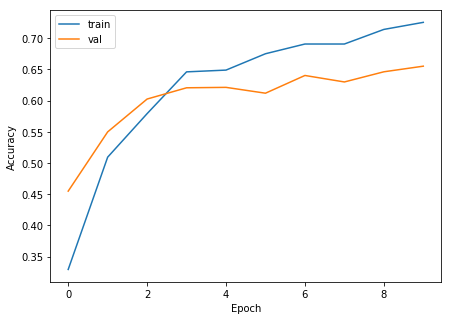

In [0]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## [TASK] Evaluasi Model
<font color='red' size=5><pre>Evaluasikan modelmu pada data test</pre></font>


In [0]:
scores = myModel.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores[1]*100))

2000/2000 [==============================] - 16s 8ms/sample - loss: 1.3156 - acc: 0.6325

Model Accuracy: 63.25%


In [0]:
print('Test loss    :', scores[0])
print('Test accuracy: %.2f%%' % (scores[1]*100))

Test loss    : 1.3155666456222534
Test accuracy: 63.25%


---
# Save Model


## [TASK] Save model into .h5 file

<font color='red' size=5><pre>Simpan model terbaikmu dengan nama file 'model_kelompok.h5'</pre></font>

* misal kelompok kalian adalah kelompok `3_2`,
* maka nama file model haruslah `model_3_2.h5`

In [0]:
# model.save('model_1_5.h5')

## [TASK] Download model


<font color='red' size=5><pre>Download modelmu dari tab `Files`</pre></font>

## [TASK] Upload model


<font color='red' size=5><pre>Upload modelmu ke suatu storage cloud,<br>Kumpulkan link di google sheet daftar kelompok</pre></font>

## [TASK] Share File Colab


<font color='red' size=5><pre>Share dan Set file colaboratory ini agar bisa dilihat oleh orang lain<br>
Copy link file colaboratory
Lalu kumpulkan link di google sheet daftar kelompok</pre></font>

---
# Menguji Pada Image Dari Internet

<br>

**OPTIONAL TASK**<br>
<font color='blue' size=5><pre>tambahkan 5 gambar baru, dan coba modelmu terhadap gambar tersebut</pre></font>

* Search Gambar di Internet (Google Image)
* Copy Image Address
* Paste Image Address ke cell di bawah

In [0]:
!wget -O 'data_test_0.jpg' 'http://news.bbc.co.uk/olmedia/990000/images/_990652_airbus300.jpg' 
!wget -O 'data_test_1.jpg' 'https://media.ed.edmunds-media.com/non-make/ot/ot_6171900_1600.jpg'
!wget -O 'data_test_2.jpg' 'https://c8.alamy.com/comp/GDY8J7/an-old-red-and-black-steam-train-in-a-trainstation-before-departure-GDY8J7.jpg'
!wget -O 'data_test_3.jpg' 'https://saywhat.news/wp-content/uploads/2018/10/img12-5.jpg'
!wget -O 'data_test_4.jpg' 'https://www.rspcasa.org.au/wp-content/uploads/2019/01/Adopt-a-cat-or-kitten-from-RSPCA.jpg'

--2019-08-14 15:23:25--  http://news.bbc.co.uk/olmedia/990000/images/_990652_airbus300.jpg
Resolving news.bbc.co.uk (news.bbc.co.uk)... 212.58.249.144, 212.58.244.56
Connecting to news.bbc.co.uk (news.bbc.co.uk)|212.58.249.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12103 (12K) [image/jpeg]
Saving to: ‘data_test_0.jpg’

data_test_0.jpg     100%[===================>]  11.82K  --.-KB/s    in 0s      

2019-08-14 15:23:26 (244 MB/s) - ‘data_test_0.jpg’ saved [12103/12103]

--2019-08-14 15:23:27--  https://media.ed.edmunds-media.com/non-make/ot/ot_6171900_1600.jpg
Resolving media.ed.edmunds-media.com (media.ed.edmunds-media.com)... 159.180.93.4
Connecting to media.ed.edmunds-media.com (media.ed.edmunds-media.com)|159.180.93.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125271 (122K) [image/jpeg]
Saving to: ‘data_test_1.jpg’

data_test_1.jpg     100%[===================>] 122.33K  --.-KB/s    in 0.03s   

2019-08-14 15:23:28 (4.

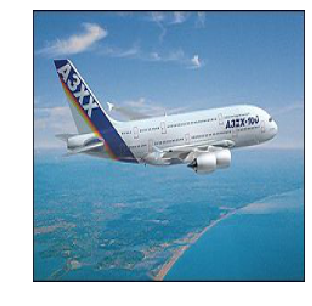

id kelas prediksi 0
kelas prediksi aeroplane


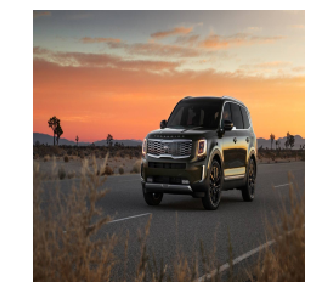

id kelas prediksi 6
kelas prediksi car


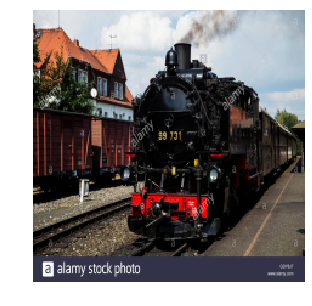

id kelas prediksi 18
kelas prediksi train


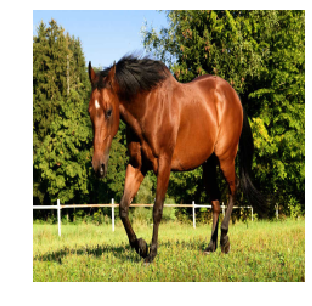

id kelas prediksi 12
kelas prediksi horse


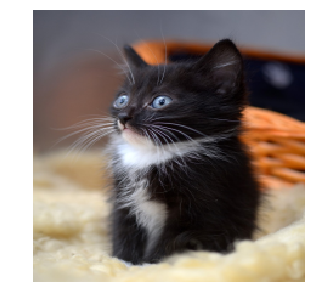

id kelas prediksi 7
kelas prediksi cat


In [0]:
for i in range(5):
  new_img = Image.open('data_test_'+str(i)+'.jpg')
  new_img = np.array(new_img)
  new_img2 = cv.resize(new_img, input_shape[:2], interpolation=cv.INTER_AREA)
  plt.imshow(new_img2)
  plt.axis('off')
  plt.show()

  new_img2 = np.expand_dims(new_img2,0)
  pred = myModel.predict(new_img2)
  class_id = np.argmax(pred)
  print('id kelas prediksi',class_id)
  print('kelas prediksi', class_names[class_id])

<p>Copyright &copy; 2019 <a href=https://www.linkedin.com/in/andityaarifianto/>ADF</a> </p>